In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

## Load Dataset IRENA

In [2]:
# base_path = os.path.dirname(__file__)
# file_path = os.path.join(base_path, 'data_test', 'IRENA_Stats_Extract_2024_H1_V1.xlsx')
file_path = 'data_test/IRENA_Stats_Extract_ 2024_H1_V1.xlsx'
data = pd.read_excel(file_path, sheet_name='Country')
data.head()

,Region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Unnamed: 11,Unnamed: 12,Unnamed: 13,0
0,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2000,5459.01,NaN,NaN,NaN,NaN
1,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2001,5455.50,NaN,NaN,NaN,NaN
2,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2002,5891.01,NaN,NaN,NaN,NaN
3,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2003,6013.24,NaN,NaN,NaN,NaN
4,Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2004,6305.24,NaN,NaN,NaN,NaN


In [3]:
df = data.copy()


In [4]:
df['Group Technology'].unique()

array(['Fossil fuels', 'Hydropower (excl. Pumped Storage)',
       'Solar energy', 'Wind energy', 'Bioenergy', 'Geothermal energy',
       'Pumped storage', 'Nuclear', 'Other non-renewable energy',
       'Marine energy'], dtype=object)

In [5]:
df = df[df["Group Technology"].isin(['Hydropower (excl. Pumped Storage)',
       'Solar energy', 'Wind energy', 'Bioenergy', 'Geothermal energy',
       'Pumped storage',
       'Marine energy'])]
df.head()

,Region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Installed Capacity (MW),Unnamed: 11,Unnamed: 12,Unnamed: 13,0
72,Africa,Algeria,DZA,12,Total Renewable,Hydropower (excl. Pumped Storage),Renewable hydropower,Renewable hydropower,On-grid electricity,2000,276.6,NaN,NaN,NaN,NaN
73,Africa,Algeria,DZA,12,Total Renewable,Hydropower (excl. Pumped Storage),Renewable hydropower,Renewable hydropower,On-grid electricity,2001,276.6,NaN,NaN,NaN,NaN
74,Africa,Algeria,DZA,12,Total Renewable,Hydropower (excl. Pumped Storage),Renewable hydropower,Renewable hydropower,On-grid electricity,2002,276.6,NaN,NaN,NaN,NaN
75,Africa,Algeria,DZA,12,Total Renewable,Hydropower (excl. Pumped Storage),Renewable hydropower,Renewable hydropower,On-grid electricity,2003,276.6,NaN,NaN,NaN,NaN
76,Africa,Algeria,DZA,12,Total Renewable,Hydropower (excl. Pumped Storage),Renewable hydropower,Renewable hydropower,On-grid electricity,2004,276.6,NaN,NaN,NaN,NaN


## Calculate yearly sum worldwide

In [6]:
df_sum_per_year = (
    df
    .groupby(["Year", "Country", "Group Technology"], as_index=False)["Electricity Installed Capacity (MW)"]
    .sum()
)
df_sum_per_year

,Year,Country,Group Technology,Electricity Installed Capacity (MW)
0,2000,Afghanistan,Hydropower (excl. Pumped Storage),191.503
1,2000,Albania,Hydropower (excl. Pumped Storage),1453.000
2,2000,Algeria,Hydropower (excl. Pumped Storage),276.600
3,2000,Andorra,Hydropower (excl. Pumped Storage),30.000
4,2000,Angola,Hydropower (excl. Pumped Storage),235.579
...,...,...,...,...
15088,2023,Zambia,Hydropower (excl. Pumped Storage),3165.052
15089,2023,Zambia,Solar energy,124.268
15090,2023,Zimbabwe,Bioenergy,100.000
15091,2023,Zimbabwe,Hydropower (excl. Pumped Storage),1080.015


In [7]:
df_sum_per_year[df_sum_per_year['Group Technology'] == 'Geothermal energy']

,Year,Country,Group Technology,Electricity Installed Capacity (MW)
6,2000,Argentina,Geothermal energy,0.600
13,2000,Australia,Geothermal energy,0.200
65,2000,China,Geothermal energy,21.650
83,2000,Costa Rica,Geothermal energy,144.710
117,2000,El Salvador,Geothermal energy,161.240
...,...,...,...,...
14901,2023,Romania,Geothermal energy,0.050
14907,2023,Russian Federation (the),Geothermal energy,74.000
15010,2023,Thailand,Geothermal energy,0.300
15033,2023,Türkiye,Geothermal energy,1691.338


In [8]:
df_sum_per_technology_year = (
    df
    .groupby(["Year", "Group Technology"], as_index=False)["Electricity Installed Capacity (MW)"]
    .sum()
)
df_sum_per_technology_year

,Year,Group Technology,Electricity Installed Capacity (MW)
0,2000,Bioenergy,2.833012e+04
1,2000,Geothermal energy,8.272700e+03
2,2000,Hydropower (excl. Pumped Storage),6.971700e+05
3,2000,Marine energy,2.382500e+02
4,2000,Pumped storage,8.496655e+04
...,...,...,...
163,2023,Hydropower (excl. Pumped Storage),1.267903e+06
164,2023,Marine energy,5.269200e+02
165,2023,Pumped storage,1.398512e+05
166,2023,Solar energy,1.418969e+06


In [9]:
yearly_sum = (
    df
    .groupby("Year", as_index=False)["Electricity Installed Capacity (MW)"]
    .sum()
)
yearly_sum

,Year,Electricity Installed Capacity (MW)
0,2000,8.371590e+05
1,2001,8.549736e+05
2,2002,8.768160e+05
3,2003,9.078052e+05
4,2004,9.435711e+05
5,2005,9.866573e+05
6,2006,1.031192e+06
7,2007,1.086492e+06
8,2008,1.152467e+06
9,2009,1.237191e+06


<Axes: >

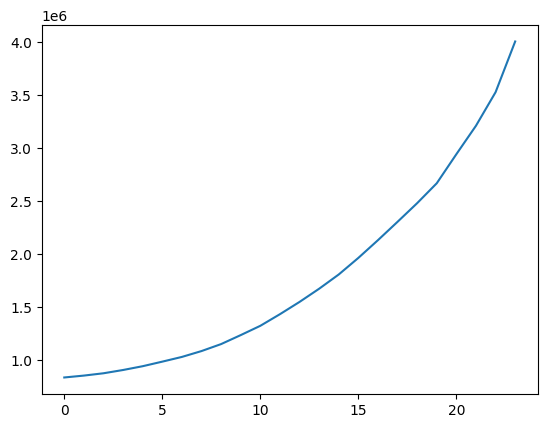

In [10]:
yearly_sum['Electricity Installed Capacity (MW)'].plot()

## ARIMA Model



In [18]:
yearly_sum = yearly_sum.sort_values("Year")
ts = yearly_sum.set_index("Year")["Electricity Installed Capacity (MW)"]  # Zeitreihe
ts

Year
2000    8.371590e+05
2001    8.549736e+05
2002    8.768160e+05
2003    9.078052e+05
2004    9.435711e+05
2005    9.866573e+05
2006    1.031192e+06
2007    1.086492e+06
2008    1.152467e+06
2009    1.237191e+06
2010    1.324973e+06
2011    1.434579e+06
2012    1.550463e+06
2013    1.674971e+06
2014    1.809587e+06
2015    1.966007e+06
2016    2.133550e+06
2017    2.306926e+06
2018    2.482906e+06
2019    2.670932e+06
2020    2.945286e+06
2021    3.213850e+06
2022    3.530707e+06
2023    4.009556e+06
Name: Electricity Installed Capacity (MW), dtype: float64

In [20]:
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/py

In [22]:
forecast = model_fit.forecast(steps=1)
print("Prognose für 2024:", forecast.iloc[0])


Prognose für 2024: 4034201.344726419


/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/steffen/.pyenv/versions/SolarSoundBytes/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


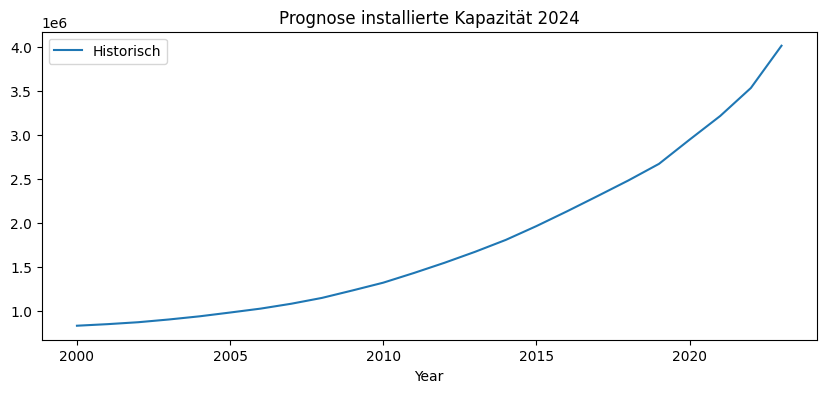

In [ ]:
ts.plot(label="Historisch", figsize=(10, 4))
forecast.plot(label="Prognose 2024", style='--', color='red')
plt.legend()
plt.title("Prognose installierte Kapazität 2024")
plt.show()